<img src="Images/logo.jpg" width="600">

## Exercitation_08

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

###  Part 01
    
I started on the basis of the code developed in the fifth exercitation. I modified the Metropolis algorithm in the file `func.cpp` making it in 1D and with *Uniform* probability of transition. I added to it in input a vector of parameters, i.e. $\mu$ and $\sigma$ in this case. Finally I wrote a function for the trial wavefunction $\Psi_T$ and the energy (with its second derivative).  
The given trial wavefunction and the energy are
    $$ \Psi_T^{\sigma,\mu}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}} \\
     \Longrightarrow H=-\frac{1}{2}\psi''(x)+V(x)=-\frac{1}{2\sigma^2}\left[-\psi(x)+(x-\mu)^2e^{-\frac{(x-\mu)^2}{2\sigma^2}}+(x+\mu)^2e^{-\frac{(x+\mu)^2}{2\sigma^2}}\right] + V(x).
$$
    
I also performed some test of sampling in the `main` with reasonable (but random chosen by me) values of the parameters.  
    
###  Part 02
    
I looked for the minimum of energy making the parameters varying with two *for* cycles. After some attemp, I decided to use $\sigma$ in $[0.3,1]$ and $\mu$ in $[0.5,1.2]$ with steps of $0.01$. For every possible pair of values, I calculated the energy of the system and I saved the lowest value, with the respective $\sigma$ and $\mu$.  
In these simulations I used $10^4$ steps (first 1000 discarded), step fixed to have an acceptance of 40-50%, and I got the best fit values (printed in `opt_param.dat`)
    
$$ \mu_{opt} = 0.82 \, , \quad \quad  \sigma_{opt} = 0.66 \, , \quad \quad  E_{min}=-0.458325     $$
    
Here I report the histogram of the data, the function with the best fit parameters and the numeric solution given in this exercitation lesson.  
On the right, I plot the mean value $<H>$ and its uncertainty, evaluated with $N_{bl}=100$. I also compare it with the numerical result given.

In [3]:
def psi2_T(x,mu,sigma):
    psi = np.exp( -(x-mu)**2/(2.*sigma**2) ) + np.exp( -(x+mu)**2/(2.*sigma**2) )
    norm = 2. * sigma * np.sqrt(np.pi) * ( 1. + np.exp(-mu**2/sigma**2) )
    return  psi**2/norm

def Vpot(x):
    return (x**2 - 2.5)*x**2

N = 1000 # number of iterations

x = np.linspace(-2.5, 2.5, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-CDiff)/(2*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)

psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

Ground state energy:  -0.4602271303987077


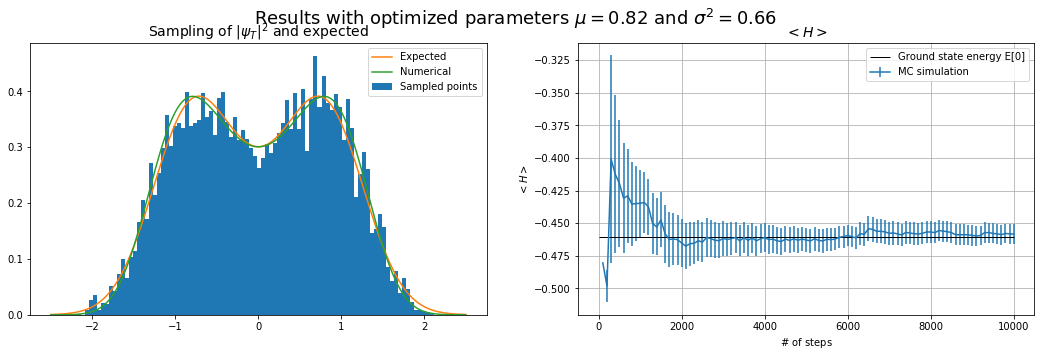

In [6]:
dist = ascii.read('P1-2/Risultati/Psi.min', format='no_header')
data = ascii.read('P1-2/Risultati/En.min', format='no_header')
par= ascii.read('P1-2/Risultati/opt_param.dat')
x = np.linspace(-2.5, 2.5, 1000)

plt.figure(figsize=(18,5))
plt.suptitle('Results with optimized parameters $\mu=0.82$ and $\sigma^2=0.66$ ', fontsize = 18)

plt.subplot(121)
plt.title('Sampling of $|\psi_T|^2$ and expected', fontsize = 14)
dist = dist['col1']
plt.hist(dist, bins=100, label='Sampled points', density=True)
plt.plot(x, psi2_T(x, par['mu_opt'], par['sigma_opt']), label = 'Expected')
plt.plot(x,(psi[0])**2, label='Numerical')
plt.legend()

plt.subplot(122)
plt.title('$<H>$', fontsize = 14)
datax = data['col1']
datad = data['col2']
dataerr = data['col3']
plt.errorbar(datax, datad, dataerr , label= 'MC simulation')
plt.hlines(E[0],0, max(datax), label='Ground state energy E[0]', lw=1)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<H>$')
plt.grid()
plt.legend()
plt.show()

The data and the two curves are in good concordance, but still not superimposed. On the right, the simulation correctly converges to the expected value.

###  Part 03
    
I added to the given `QMC1D` code the potential $V(x) = x^4 - \frac{5}{2}x^2$ and its first and second derivative, and then the wavefunction and its second derivative.  
I executed *PIGS* code with different imaginary time propagation. Here I compare these results with the Variational Monte Carlo performed in the previous parts using Uniform probability of transition (on the left) and using the trial wavefunction with the best parameters described in <span style="color:blue">Part 02</span>.

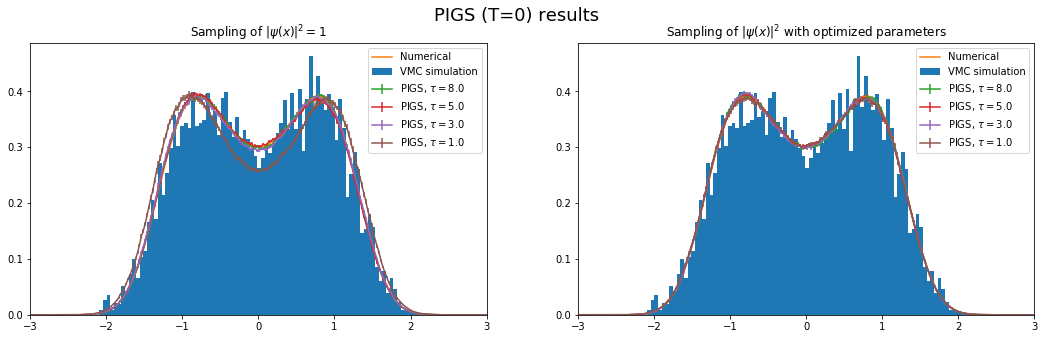

In [7]:
du8=ascii.read('P3/PIGS_unif/probability8.dat', format='no_header')
u8= du8['col2']
eu8= du8['col3']
x1 = du8['col1']
du5=ascii.read('P3/PIGS_unif/probability5.dat', format='no_header')
u5= du5['col2']
eu5= du5['col3']
du3=ascii.read('P3/PIGS_unif/probability3.dat', format='no_header')
u3= du3['col2']
eu3= du3['col3']
du1=ascii.read('P3/PIGS_unif/probability1.dat', format='no_header')
u1= du1['col2']
eu1= du1['col3']
plt.figure(figsize=(18,5))
plt.suptitle('PIGS (T=0) results', fontsize = 18)
plt.subplot(121)
plt.title('Sampling of $|\psi(x)|^2=1$')
plt.hist(dist, bins=100, label='VMC simulation', density=True)
plt.plot(x,(psi[0])**2, label='Numerical')
plt.errorbar(x1, u8, eu8, label=r'PIGS, $\tau=8.0$')
plt.errorbar(x1, u5, eu5, label=r'PIGS, $\tau=5.0$')
plt.errorbar(x1, u3, eu3, label=r'PIGS, $\tau=3.0$')
plt.errorbar(x1, u1, eu1, label=r'PIGS, $\tau=1.0$')
plt.xlim(-3, 3)
plt.legend()

dw8=ascii.read('P3/PIGS_opt/probability8.dat', format='no_header')
w8= dw8['col2']
ew8= dw8['col3']
dw5=ascii.read('P3/PIGS_opt/probability5.dat', format='no_header')
w5= dw5['col2']
ew5= dw5['col3']
dw3=ascii.read('P3/PIGS_opt/probability3.dat', format='no_header')
w3= dw3['col2']
ew3= dw3['col3']
dw1=ascii.read('P3/PIGS_opt/probability1.dat', format='no_header')
w1= dw1['col2']
ew1= dw1['col3']
plt.subplot(122)
plt.title('Sampling of $|\psi(x)|^2$ with optimized parameters')
plt.hist(dist, bins=100, label='VMC simulation', density=True)
plt.plot(x,(psi[0])**2, label='Numerical')
plt.errorbar(x1, w8, ew8, label=r'PIGS, $\tau=8.0$')
plt.errorbar(x1, w5, ew5, label=r'PIGS, $\tau=5.0$')
plt.errorbar(x1, w3, ew3, label=r'PIGS, $\tau=3.0$')
plt.errorbar(x1, w1, ew1, label=r'PIGS, $\tau=1.0$')
plt.xlim(-3, 3)

plt.legend()

plt.show()

As we seen in the theory lesson, there is exponential convergence and for large imaginary time evolutions the quantum state becomes essentially proportional to the exact ground state. With the Uniform transition we can appreciate a significative difference and bad agreement in the case $\tau=1.0$ and a good agreement for the greater values, while in the plot on the right with the best parameter there is a better agreement also with low $\tau$. 


Finally, I used the PIMC code to observe how the increment of the temperature influence the results. I used temperature between $0.2$ and $1.4$ in steps of $0.4$:

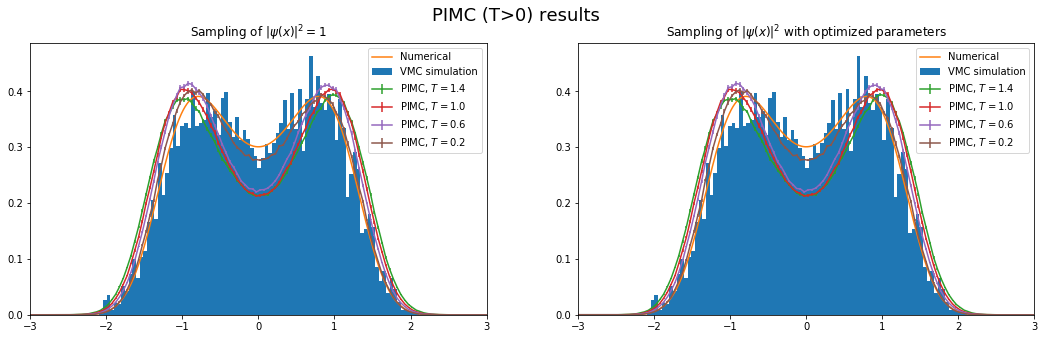

In [8]:
du14=ascii.read('P3/PIMC_unif/probability14.dat', format='no_header')
u14= du14['col2']
eu14= du14['col3']
x1 = du14['col1']
du10=ascii.read('P3/PIMC_unif/probability10.dat', format='no_header')
u10= du10['col2']
eu10= du10['col3']
du6=ascii.read('P3/PIMC_unif/probability6.dat', format='no_header')
u6= du6['col2']
eu6= du6['col3']
du2=ascii.read('P3/PIMC_unif/probability2.dat', format='no_header')
u2= du2['col2']
eu2= du2['col3']
plt.figure(figsize=(18,5))
plt.suptitle('PIMC (T>0) results', fontsize = 18)
plt.subplot(121)
plt.title('Sampling of $|\psi(x)|^2=1$')
plt.hist(dist, bins=100, label='VMC simulation', density=True)
plt.plot(x,(psi[0])**2, label='Numerical')
plt.errorbar(x1, u14, eu14, label=r'PIMC, $T=1.4$')
plt.errorbar(x1, u10, eu10, label=r'PIMC, $T=1.0$')
plt.errorbar(x1, u6, eu6, label=r'PIMC, $T=0.6$')
plt.errorbar(x1, u2, eu2, label=r'PIMC, $T=0.2$')
plt.xlim(-3, 3)
plt.legend()

dw14=ascii.read('P3/PIMC_opt/probability14.dat', format='no_header')
w14= dw14['col2']
ew14= dw14['col3']
dw10=ascii.read('P3/PIMC_opt/probability10.dat', format='no_header')
w10= dw10['col2']
ew10= dw10['col3']
dw6=ascii.read('P3/PIMC_opt/probability6.dat', format='no_header')
w6= dw6['col2']
ew6= dw6['col3']
dw2=ascii.read('P3/PIMC_opt/probability2.dat', format='no_header')
w2= dw2['col2']
ew2= dw2['col3']
plt.subplot(122)
plt.title('Sampling of $|\psi(x)|^2$ with optimized parameters')
plt.hist(dist, bins=100, label='VMC simulation', density=True)
plt.plot(x,(psi[0])**2, label='Numerical')
plt.errorbar(x1, w14, ew14, label=r'PIMC, $T=1.4$')
plt.errorbar(x1, w10, ew10, label=r'PIMC, $T=1.0$')
plt.errorbar(x1, w6, ew6, label=r'PIMC, $T=0.6$')
plt.errorbar(x1, w2, ew2, label=r'PIMC, $T=0.2$')
plt.xlim(-3, 3)
plt.legend()
plt.show()

We can see that the results in both cases quickly depart from the numerical solution for the ground state, because increasing the temperature let some excited state to be populated. The two plots are very similar, so I can conclude that the different wavefunction form is not so relevant in this situation.   